# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

## Introduction

Heart disease, also known as cardiovascular disease (CVD), refers to a range of conditions that affects the heart and blood vessels. As a whole, it is one of the leading causes of death globally, taking an estimated 17.9 million lives annually. In Singapore alone, CVD accounted for 31.4% of all deaths in 2022.

Early detection of heart diseases is cruical towards reducing suffering and preventing further heart complications. Such early identification would also aid in helping one change their lifestyle factors before it may be too late.

Current traditional methods of detecting CVD include electrocardiography (ECG) and angiography. Although ECG is non-invasive, it cannot provide a definite diagnosis of CVD. Conversely, while angiography may provide a more definite diagnosis, it is invasive and can have various side effects and complications.


Our project aims to provide a measure to detect CVD in a non-invasive but definite way for early screening purposes.

## Defining the Problem Statement

Can we identify whether a patient has a heart disease or not accurately?

### Essential Libraries

Let us begin by importing the essential Python Libraries for Data Extraction and Cleaning.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

### Import the Dataset

We will be using the Heart Disease Dataset by David Lapp on Kaggle for our project.

Dataset on [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 

### Context


We chose this dataset in favour of other popular ones online because it contains an ample amount of both categorical and numerical variables for us to work with. Our dataset dates from 1988 and consists of 1025 datapoints from four databases (Cleveland, Hungary, Switzerland and Long Beach V) indicating that the breadth of our data source is relatively wide enough for us to depend on.

In [3]:
# Importing our dataset
data = pd.read_csv("heart.csv")

#Printing our dataset to take a peek at it's initial state
print("Data dimensions:", data.shape)

data

Data dimensions: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp`: Chest pain type (4 values) (Categorical)
4. `trestbps`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol`: Serum cholestoral in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak`: ST depression induced by exercise relative to rest (Numerical)
11. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
12. `ca`: Number of major vessels (0-3) colored by flourosopy (Categorical)
13. `thal`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
14. `target`: 0 = no heart disease; 1 = heart disease (Categorical)

The names and social security numbers of the patients have been removed from the database and replaced with dummy values.

### Renaming the Dataset



Taking a look at our dataset, we realise that certain attributes such as `thalach` and `exang` are difficult to understand for somebody that has no medical knowledge relating to heart diseases. While it is technically still possible to keep referring to the glossary to understand our dataset, we will be renaming our columns to increase readability for our viewers.

In [4]:
data.rename(columns = {'cp': 'chest_pain', 'trestbps':'blood_pressure', 'chol':'cholestorol', 'fbs':'fasting_blood_sugar',
           'restecg':'electrocardiograph', 'thalach':'max_heart_rate', 'exang':'induced_angina', 'oldpeak':'st_depression',
           'ca':'flourosopy_vessel', 'thal':'defect', 'target':'heart_disease'}, inplace = True)

data

,age,sex,chest_pain,blood_pressure,cholestorol,fasting_blood_sugar,electrocardiograph,max_heart_rate,induced_angina,st_depression,slope,flourosopy_vessel,defect,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Final Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholestoral`: Serum cholestoral in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `electrocardiograph`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
12. `ca` changed to `flourosopy_vessel`: Number of major vessels (0-3) colored by flourosopy (Categorical)
13. `thal` changed to `defect`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
14. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)

The names and social security numbers of the patients have been removed from the database and replaced with dummy values.

### Initial Exploratory Analysis

From our attribute information, we know that variables such as `sex`, `chest_pain`, `fasting_blood_sugar`, `electrocardiograph`, `induced_angina`, `slope`, `flourosopy_vessel`, `defect` and `heart_disease` are categorical values. The remaining data should be numerical.

Lets take a look at the raw data that we would be dealing with

In [5]:
# Providing a visual representation of what we are going to be dealing with
data.info()

#Statistical summary of the data that we will be dealing with
data.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   sex                  1025 non-null   int64  
 2   chest_pain           1025 non-null   int64  
 3   blood_pressure       1025 non-null   int64  
 4   cholestorol          1025 non-null   int64  
 5   fasting_blood_sugar  1025 non-null   int64  
 6   electrocardiograph   1025 non-null   int64  
 7   max_heart_rate       1025 non-null   int64  
 8   induced_angina       1025 non-null   int64  
 9   st_depression        1025 non-null   float64
 10  slope                1025 non-null   int64  
 11  flourosopy_vessel    1025 non-null   int64  
 12  defect               1025 non-null   int64  
 13  heart_disease        1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,chest_pain,blood_pressure,cholestorol,fasting_blood_sugar,electrocardiograph,max_heart_rate,induced_angina,st_depression,slope,flourosopy_vessel,defect,heart_disease
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


## Data Cleaning

> The dataset chosen by you may not be in the proper format to solve the problem you targeted. Preparing means cleaning the data, resizing/reshaping the data, removing outliers (if necessary), balancing imbalanced classes (if necessary), grouping the rows/columns as necessary, etc.

Taking a look at the statistical summary of our dataset above, we realised that some of the raw data are simply inaccurate. The following outlines the inaccurate data points that we identified.

>1. `defect` should be between 1-3 but the statistical summary above tells us that that the min of `defect` is 0 (min = 0.00) which should not be possible 
>2. `flourosopy_vessel` should be between 0-3 but the statistical summary above tells us that the max of `flourosopy_vessel` is 4 (max = 4.00) which should not be possible

We will be removing these inaccurate datapoints in order to clean our dataset

In [6]:
# Keeping only the data that does not have these inaccuracies
clean_data = data[(data["defect"] != 0) & (data["flourosopy_vessel"] != 4)].reset_index() # make sure to reset the index

clean_data

,index,age,sex,chest_pain,blood_pressure,cholestorol,fasting_blood_sugar,electrocardiograph,max_heart_rate,induced_angina,st_depression,slope,flourosopy_vessel,defect,heart_disease
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
996,1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
997,1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
998,1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Checking for NULL Values

Our dataset should not contain any NULL values so that all datapoints are valid. If we have any NULL values we would have to remove them from our dataset.

We do not need to check for duplicates because it is possible for 2 individuals to suffer from the exact same conditions.

In [1]:
# Checking for NULL Values

clean_data.isnull().sum(axis=0)

NameError: name 'clean_data' is not defined

### Splitting our dataset

In order to check for Outliers and Imbalance later on we shall split out data into catergorical and numerical variables.

In [7]:
#Splitting out dataset into categorical and numerical variables
#Index is not a categorical variable but we shall keep it there in both columns for referencing purposes
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "electrocardiograph", "induced_angina", "slope", "flourosopy_vessel",
           "defect", "heart_disease"]
num_var = [var for var in clean_data.columns if var not in cat_var]

### Checking for Outliers

The XGBoost model that we will be using later on is sensitive to Outliers, hence we shall remove them where necessary in based on our numerical variables.

In [8]:
#Creating a dataframe with only numerical variables
numerical_df = clean_data[num_var].copy()

#Drop the index column
numerical_df.drop("index", axis=1, inplace=True)

#We find the interquartile range and determine the lowerBound and upperBound respectively
q1 = numerical_df.quantile(0.25)
q3 = numerical_df.quantile(0.75)
iqr = q3-q1
lowerBound = q1 - (1.5*iqr)
upperBound = q3 + (1.5*iqr)

#Now we want to find out the union between our groups of outliers along all numerical variables
#We want to extract data where any column contains an outlier
#consolidate contains true or false depending on whether there exist an outlier in that row
consolidate = ((numerical_df < lowerBound) | (numerical_df > upperBound)).any(axis=1)

#Removing the outliers in our dataset
#We want to keep the data where consolidate is false meaning no outliers
clean_data = clean_data[~consolidate]

# Reset the indexes
clean_data.reset_index(drop=True, inplace=True)

### Checking for Imbalance

An imbalanced dataset could affect FPR/FNR values of our model (If our response target is imbalanced). Our variables should not be imbalanced where possible as well because XGBoost may struggle with imbalanced datasets. Let us check for imbalance in any of the variables.

### Checking for Imbalance (Numerical Data)

To check for imbalance in numerical variables, we will be taking a look at their distributions as compared to the normal distribution. Since our dataset is relatively large (999 entries) we would expect a normal distribution if our dataset is balanced. We will be using a Quantile-Quantile (Q-Q) plot to check against a normal distribution.

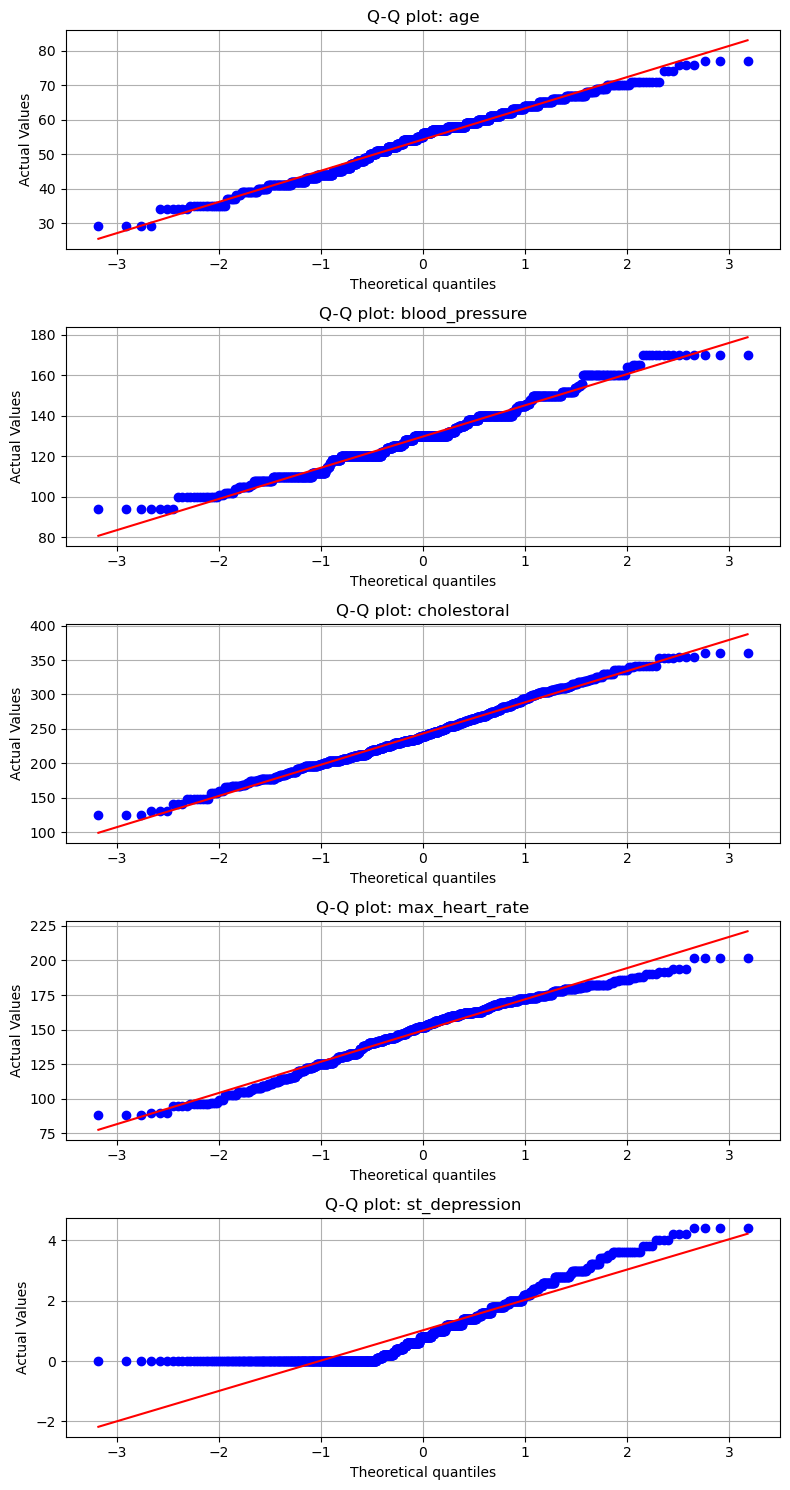

In [9]:
# Import the plot library
import matplotlib.pyplot as plt

# Import the stats library to use probplot
import scipy.stats as stats

# Loop through the numerical columns, ignoring index
f, axes = plt.subplots(5, 1, figsize = (8, 15))
for i, var in enumerate(num_var[1:]):
    ax = axes[i]
    stats.probplot(clean_data[var], dist="norm", plot=ax)
    ax.set_title(f'Q-Q plot: {var}')
    ax.set_xlabel('Theoretical quantiles')
    ax.set_ylabel('Actual Values')
    ax.grid(True)
    
plt.tight_layout()
plt.show()

### Intepreting our Q-Q Plots

Based on the graphs above we can see that most of them follow a normal distribution. Although there are some outliers in place the methods that we will be using later on are not sensitive to outliers, hence there is no need to correct most of our data for imbalance./

However we can see an abnormally in our Q-Q plots for `st_depression`. This is because `st_depression` is only able to start from 0. To better understand the `st_depression` data that we are working with lets take a look at the distribution of `st_depression`./

We will also be taking a look at the skew of `st_depression`.

Skewness of st_depression: 0.9222804080879955


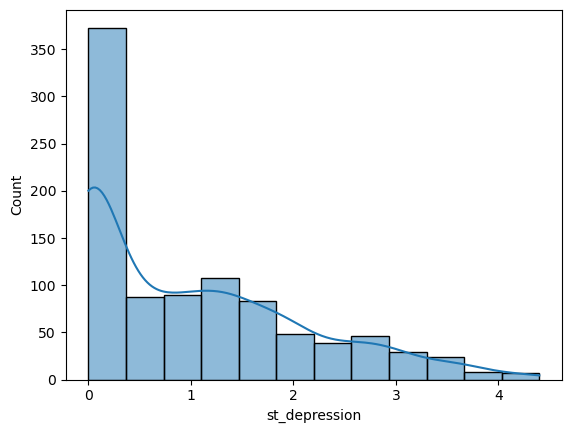

In [10]:
# Import seabon package to plot data
import seaborn as sb
sb.histplot(data = clean_data["st_depression"],kde = True)

print("Skewness of st_depression: {}".format(clean_data["st_depression"].skew()))

### Analysing st_depression data

Taking a look at the distribution and skewness of the data, we can see that the st_depression data is extremely positively skewed. In order to fix this imbalance to ensure that our data follows a normal distribution, we shall be using the applying a Yeo-Johnson transformation onto `st_depression`. (We are doing this because XGBoost may sometimes struggle with imbalanced data) The Yeo-Johnson transformation uses a lambda parameter to transform the data, for our purposes we only need the transformed array. A normal boxcox only takes in positive values, since we are dealing with 0 values as well we will be using Yeo-Johnson transofmration which is able to handle 0 and negative values as well.

Skewness of st_depression: 0.10112254711609758


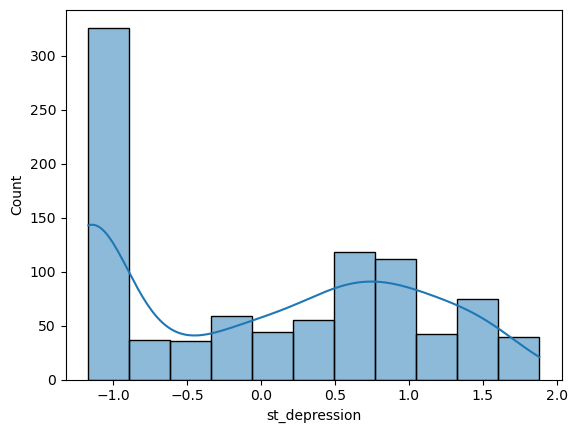

In [11]:
#Importing Yeo-Johnson
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Fit the transformer with st_depression
pt.fit(clean_data[["st_depression"]])

# Transform the st_depression
# We use clean_data.loc to remove the error of python being unsure of whether its modifying the copy or original
clean_data.loc[:, "st_depression"] = pt.transform(clean_data[["st_depression"]])

#Check again for skewness and replot to see a difference
sb.histplot(data = clean_data["st_depression"],kde = True)

print("Skewness of st_depression: {}".format(clean_data["st_depression"].skew()))


### Reanalysing st_depression data

Taking a look at our new st_depression data, we can see that the imbalanced has been relatively fixed as the skewness is greatly reduced from ~1 to ~0.1

### Checking for Imbalance (Categorical Data)

To check for imbalance in categorical variables we shall take a look at the relative frequencies for each possible occurance across all our attributes.

In [12]:
#Loop through our columns
for var in cat_var:
    print(clean_data[var].value_counts(normalize = True))

sex
1    0.711559
0    0.288441
Name: proportion, dtype: float64
chest_pain
0    0.478261
2    0.273595
1    0.169671
3    0.078473
Name: proportion, dtype: float64
fasting_blood_sugar
0    0.863203
1    0.136797
Name: proportion, dtype: float64
electrocardiograph
1    0.501591
0    0.486744
2    0.011665
Name: proportion, dtype: float64
induced_angina
0    0.671262
1    0.328738
Name: proportion, dtype: float64
slope
2    0.469777
1    0.466596
0    0.063627
Name: proportion, dtype: float64
flourosopy_vessel
0    0.570520
1    0.233298
2    0.130435
3    0.065748
Name: proportion, dtype: float64
defect
2    0.544008
3    0.388123
1    0.067869
Name: proportion, dtype: float64
heart_disease
1    0.519618
0    0.480382
Name: proportion, dtype: float64


### Improving readability

The above results works but it is not very readable. To make things more readable to us we will be formating the data above into a table. We will be using the tabulate function for this.

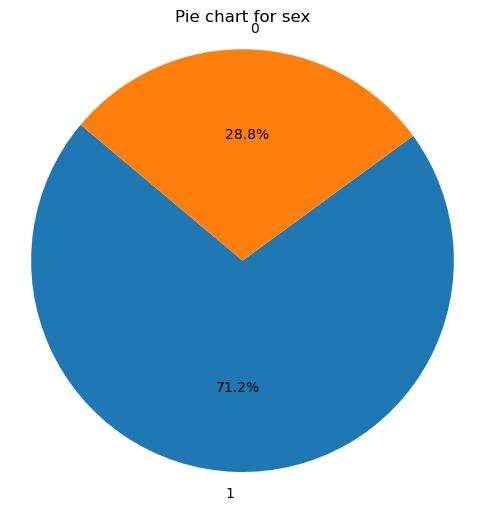

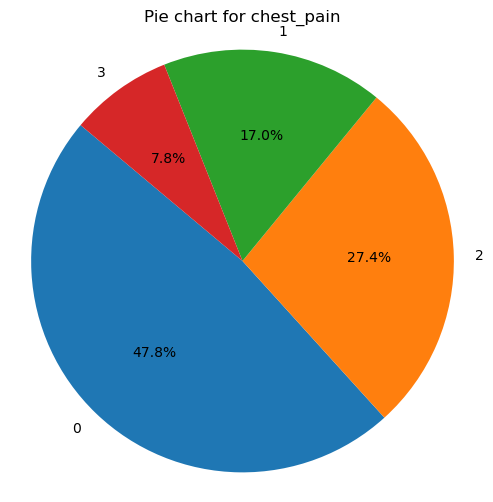

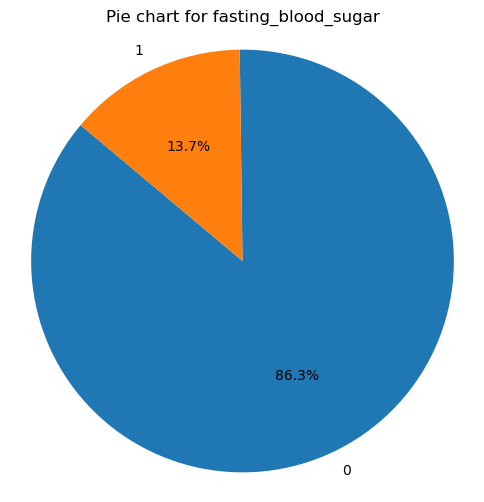

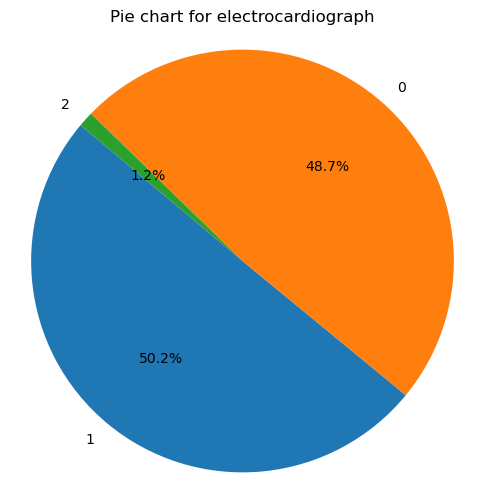

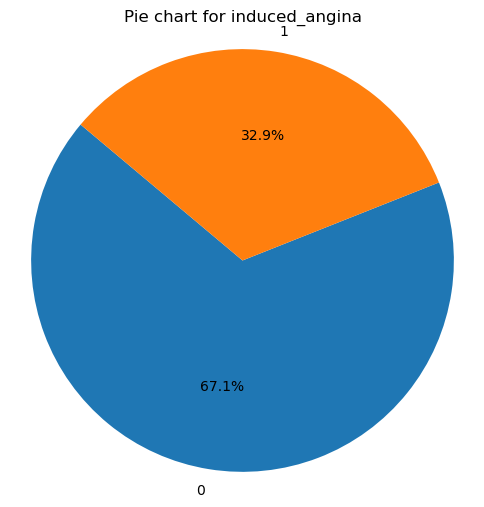

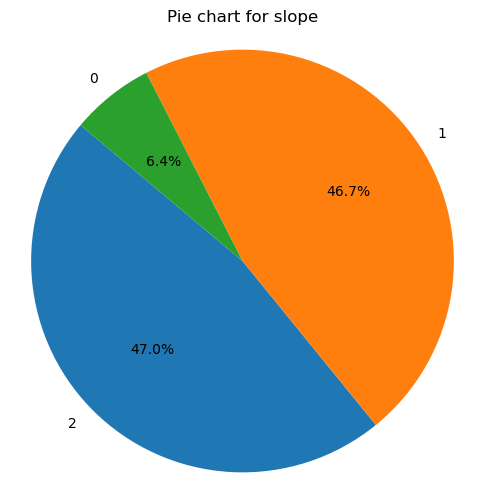

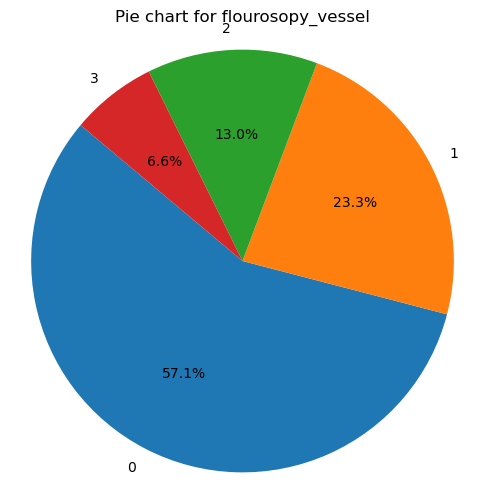

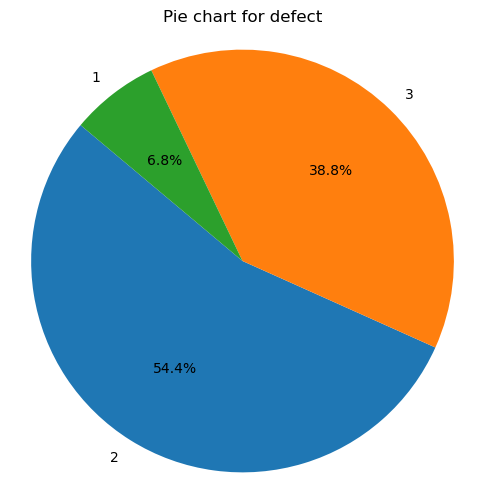

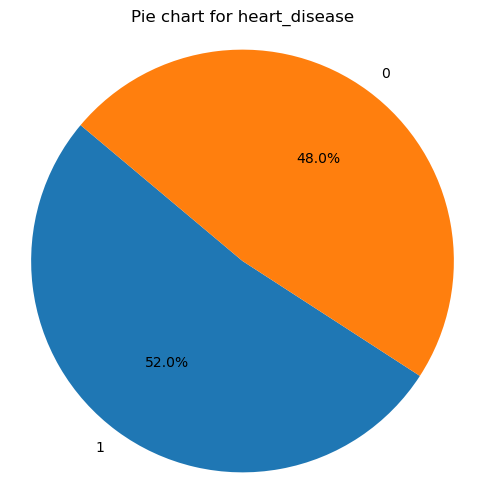

In [13]:


for var in cat_var:
    value_counts = clean_data[var].value_counts(normalize=True)
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie chart for {var}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

### Analysing Pie Charts

Based on the pie charts above, we can see that certain classes such as `electrocardiograph` and `defect` have huge class imbalances. However the main one that we want to look at is `heart_disease`. We see that we have almost a 50:50 ratio between those that have and don't have `heart_disease` which is our target variable. Hence we do not need to correct these other categorical variables for imbalance as they are all still useful datapoints. Most importantly our target variable already has a near 1:1 ratio between its classifications. 

We previously had to correct `st_depression` for imbalance as it was a numerical variable and might have caused our models to be inaccurately biased towards it. Over here since it is a categorical variable, it is actually meaningful for our models to weigh heavily towards the minority occurances if it happens.

### Saving our files

We shall save our clean_data into a csv file for future use.

In [14]:
# The code below is commented because we assume that the clean_data.csv file is already saved when you downloaded the project
# clean_data.to_csv('clean_data.csv')